<a href="https://colab.research.google.com/github/vytsb/Gilusis_Mokymas/blob/main/lab1_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
raw = pd.read_csv("IMDB Dataset.csv")
raw.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
raw["sentiment"].value_counts()

,count
sentiment,
positive,25000
negative,25000


In [ ]:
raw.isna().sum()

,0
review,0
sentiment,0


In [ ]:
aibe = set()
for x in raw["review"]:
    aibe = aibe.union(set(x))

aibe

{'\x08',
 '\t',
 '\x10',
 ' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '|',
 '}',
 '~',
 '\x80',
 '\x84',
 '\x85',
 '\x8d',
 '\x8e',
 '\x91',
 '\x95',
 '\x96',
 '\x97',
 '\x9a',
 '\x9e',
 '\xa0',
 '¡',
 '¢',
 '£',
 '¤',
 '¦',
 '§',
 '¨',
 '©',
 'ª',
 '«',
 '\xad',
 '®',
 '°',
 '³',
 '´',
 '·',
 'º',
 '»',
 '½',
 '¾',
 '¿',
 'À',
 'Á',
 'Â',
 'Ã',
 'Ä',
 'Å',
 'Æ',
 'Ç',
 'È',
 'É',
 'Ê',
 'Ï',
 'Ð',
 'Ó',
 'Õ',
 'Ö',
 'Ø',
 'Ü',
 'Þ',
 'ß',
 'à',
 'á',
 'â',
 'ã',
 'ä',
 'å',
 'æ',
 'ç',

In [ ]:
def count_symbols(row):
    result = pd.Series(list(row)).value_counts()
    return result

char_counts = raw["review"].apply(count_symbols)
char_counts

,,e,t,s,a,i,o,r,n,h,...,כ,ל,א,ג,י,★,、,，,Ø,
0,306.0,151.0,126.0,108.0,107.0,95.0,93.0,88.0,79.0,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,161.0,101.0,70.0,50.0,55.0,60.0,49.0,58.0,50.0,39.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,165.0,89.0,68.0,44.0,56.0,57.0,50.0,39.0,45.0,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,137.0,66.0,44.0,39.0,51.0,49.0,32.0,34.0,25.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,229.0,140.0,108.0,69.0,69.0,81.0,79.0,60.0,75.0,55.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,193.0,80.0,82.0,47.0,48.0,72.0,70.0,39.0,47.0,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49996,111.0,46.0,53.0,24.0,44.0,31.0,40.0,31.0,32.0,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49997,229.0,120.0,110.0,65.0,79.0,71.0,75.0,54.0,49.0,55.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49998,211.0,119.0,87.0,68.0,75.0,72.0,70.0,56.0,68.0,52.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
char_counts.columns

Index([' ', 'e', 't', 's', 'a', 'i', 'o', 'r', 'n', 'h',
       ...
       'כ', 'ל', 'א', 'ג', 'י', '★', '、', '，', 'Ø', ''],
      dtype='object', length=206)

In [ ]:
import string
string.printable

'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ \t\n\r\x0b\x0c'

In [ ]:
unexpected = []
for x in char_counts.columns:
    if x not in string.printable:
        unexpected.append(x)

print(unexpected)

['é', 'à', 'è', '\x97', 'ô', 'û', 'ó', '\x96', '´', 'ü', '\x85', 'â', 'í', '’', '–', 'ñ', '\x84', 'ë', 'ä', 'á', '¢', '¨', 'ã', 'ø', 'å', 'ï', '£', 'ú', 'ö', 'ì', 'Æ', 'Á', '“', '”', 'ê', '§', 'î', '\x91', 'ç', '»', '«', '\xa0', 'Õ', 'Ö', 'Ï', '…', '‘', '▼', 'ù', 'Ð', 'É', 'õ', '·', '½', 'ō', '\x95', '\x80', 'ý', 'ğ', 'ı', '₤', '\x10', 'Ó', 'ð', '\x9a', 'Ü', 'Ä', 'ß', 'Å', '®', '\x08', '¾', 'Ã', 'Â', 'À', 'Ż', '¡', '¿', 'º', '°', 'ò', 'Ê', '″', 'æ', 'Þ', '³', '\x8e', '\x9e', '¦', 'Ç', '\x8d', '\xad', 'È', 'ª', '©', '¤', 'מ', 'ן', 'ו', 'ר', 'כ', 'ל', 'א', 'ג', 'י', '★', '、', '，', 'Ø', '\uf0b7']


In [ ]:
char_counts[unexpected].dropna(how='all').index

Index([   29,    33,    40,    41,    65,    66,    75,    77,    89,   118,
       ...
       49870, 49878, 49885, 49921, 49928, 49939, 49972, 49974, 49977, 49990],
      dtype='int64', length=4662)

In [ ]:
# unexpected = [x for x in char_counts.columns if x not in string.printable]
# unexpected

rows_to_drop = char_counts[unexpected].dropna(how='all').index

filtered = raw.drop(rows_to_drop)
filtered['sentiment'].value_counts()

,count
sentiment,
positive,22868
negative,22470


In [ ]:
import re

In [ ]:
pattern = r"\w+"   # "<\w+\s?/\s?>"

filtered['tokens'] = filtered['review'].apply(lambda x: re.findall(pattern, x))
filtered

,review,sentiment,tokens
0,One of the other reviewers has mentioned that ...,positive,"[One, of, the, other, reviewers, has, mentione..."
1,A wonderful little production. <br /><br />The...,positive,"[A, wonderful, little, production, br, br, The..."
2,I thought this was a wonderful way to spend ti...,positive,"[I, thought, this, was, a, wonderful, way, to,..."
3,Basically there's a family where a little boy ...,negative,"[Basically, there, s, a, family, where, a, lit..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[Petter, Mattei, s, Love, in, the, Time, of, M..."
...,...,...,...
49995,I thought this movie did a down right good job...,positive,"[I, thought, this, movie, did, a, down, right,..."
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,"[Bad, plot, bad, dialogue, bad, acting, idioti..."
49997,I am a Catholic taught in parochial elementary...,negative,"[I, am, a, Catholic, taught, in, parochial, el..."
49998,I'm going to have to disagree with the previou...,negative,"[I, m, going, to, have, to, disagree, with, th..."


In [ ]:
filtered["label"] = filtered["sentiment"].replace({"positive": 1, "negative": 0})
filtered

,review,sentiment,tokens,label
0,One of the other reviewers has mentioned that ...,positive,"[One, of, the, other, reviewers, has, mentione...",1
1,A wonderful little production. <br /><br />The...,positive,"[A, wonderful, little, production, br, br, The...",1
2,I thought this was a wonderful way to spend ti...,positive,"[I, thought, this, was, a, wonderful, way, to,...",1
3,Basically there's a family where a little boy ...,negative,"[Basically, there, s, a, family, where, a, lit...",0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[Petter, Mattei, s, Love, in, the, Time, of, M...",1
...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,"[I, thought, this, movie, did, a, down, right,...",1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,"[Bad, plot, bad, dialogue, bad, acting, idioti...",0
49997,I am a Catholic taught in parochial elementary...,negative,"[I, am, a, Catholic, taught, in, parochial, el...",0
49998,I'm going to have to disagree with the previou...,negative,"[I, m, going, to, have, to, disagree, with, th...",0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, test = train_test_split(filtered, test_size=0.3, random_state=420, stratify=filtered["label"])
train['label'].value_counts(), test['label'].value_counts()

(label
 1    16007
 0    15729
 Name: count, dtype: int64,
 label
 1    6861
 0    6741
 Name: count, dtype: int64)

In [ ]:
train_x = train[['tokens']]
train_y = train['label']
test_x, test_y = test[['tokens']], test['label']

In [ ]:
all_words = set()
for y in train_x['tokens'].to_list():
    for x in y:
        all_words.add(x)


all_words = [x for y in train_x['tokens'].to_list() for x in y]
zodyno_dydis = len(set(all_words))
zodyno_dydis

102276

In [ ]:
len(train_y[train_y==1])
sum(train_y)

16007

In [ ]:
train_x[train_y==1]['tokens'].str.len().sum()

3637413

In [ ]:
# train_x[train_y==1]['tokens'].to_list()

pd.Series([x for y in train_x[train_y==1]['tokens'].to_list() for x in y]).value_counts()

,count
the,177317
and,102150
a,94699
of,89476
to,78455
...,...
krimi,1
Duman,1
Expressions,1
romany,1


In [ ]:
vocabulary_size = len(set([x for y in train_x['tokens'].to_list() for x in y]))
pos = train_x[train_y==1]['tokens']
neg = train_x[train_y==0]['tokens']

# count words in total in positive and negative classes
word_count_positive = pos.str.len().sum()
word_count_negative = neg.str.len().sum()

# count each word in positive and negative classes
# (optional) count zero counts for words which are present in one class to another class
each_word_count_positive = pd.Series([x for y in pos.to_list() for x in y]).value_counts()
each_word_count_negative = pd.Series([x for y in neg.to_list() for x in y]).value_counts()

# get likelihoods for each word in both classes
likelihood_positive = (each_word_count_positive + 1) / (word_count_positive + vocabulary_size)
likelihood_negative = (each_word_count_negative + 1) / (word_count_negative + vocabulary_size)

likelihood_positive

,count
the,4.741517e-02
and,2.731537e-02
a,2.532296e-02
of,2.392632e-02
to,2.097928e-02
...,...
krimi,5.348038e-07
Duman,5.348038e-07
Expressions,5.348038e-07
romany,5.348038e-07


In [ ]:
len(likelihood_positive), len(likelihood_negative)

(74828, 72332)

In [ ]:
not_in_negative = []
for word in likelihood_positive.index:
    if word not in likelihood_negative.index:
        not_in_negative.append(word)

not_in_positive = [x for x in likelihood_negative.index if x not in likelihood_positive.index]
not_in_neg_zeros = pd.Series(index=not_in_negative, data=0)
not_in_pos_zeros = pd.Series(index=not_in_positive, data=0)

not_in_pos_zeros

,0
Concorde,0
Gadget,0
Chupacabra,0
Grendel,0
lava,0
...,...
pullman,0
Classy,0
Kirchner,0
Rosemont,0


In [ ]:
from tqdm import tqdm

In [ ]:
def naive_bayes_prediction(train_x, train_y, test_x, token_col):
    # calculate prior class probabilities
    prior_pos = len(train_y[train_y==1]) / len(train_x)
    prior_neg = len(train_y[train_y==0]) / len(train_x)

    # calculate vocabulary size
    vocabulary_size = len(set([x for y in train_x[token_col].to_list() for x in y]))

    pos = train_x[train_y==1][token_col]
    neg = train_x[train_y==0][token_col]

    # count words in total in positive and negative classes
    word_count_positive = pos.str.len().sum()
    word_count_negative = neg.str.len().sum()

    # count each word in positive and negative classes
    # (optional) count zero counts for words which are present in one class to another class
    each_word_count_positive = pd.Series([x for y in pos.to_list() for x in y]).value_counts()
    each_word_count_negative = pd.Series([x for y in neg.to_list() for x in y]).value_counts()

    not_in_negative = []
    for word in each_word_count_positive.index:
        if word not in each_word_count_negative.index:
            not_in_negative.append(word)

    not_in_positive = [x for x in each_word_count_negative.index
                       if x not in each_word_count_positive.index]

    not_in_neg_zeros = pd.Series(index=not_in_negative, data=0)
    not_in_pos_zeros = pd.Series(index=not_in_positive, data=0)

    each_word_count_positive = pd.concat([each_word_count_positive, not_in_pos_zeros])
    each_word_count_negative = pd.concat([each_word_count_negative, not_in_neg_zeros])

    # get likelihoods for each word in both classes
    likelihood_positive = (each_word_count_positive + 1) / (word_count_positive + vocabulary_size)
    likelihood_negative = (each_word_count_negative + 1) / (word_count_negative + vocabulary_size)

    # calculate probabilites of each class for test sentences
    predictions = []
    for sentence in tqdm(test_x[token_col].to_list()):

        positive_prob = 1
        negative_prob = 1

        for word in sentence:
            if word not in likelihood_positive.index:
                continue
            result_pos = likelihood_positive[word]
            positive_prob *= result_pos
            result_neg = likelihood_negative[word]
            negative_prob *= result_neg

        predicted_class = np.argmax([negative_prob, positive_prob])
        predictions.append(predicted_class)

    return predictions

In [ ]:
preds = naive_bayes_prediction(train_x, train_y, test_x)
preds[:20]  # pirmi 20 spėjimai

100%|██████████| 13602/13602 [00:25<00:00, 539.25it/s]


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]

In [ ]:
sum(preds)  # kiek turime pozytivių spėjimų

911

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



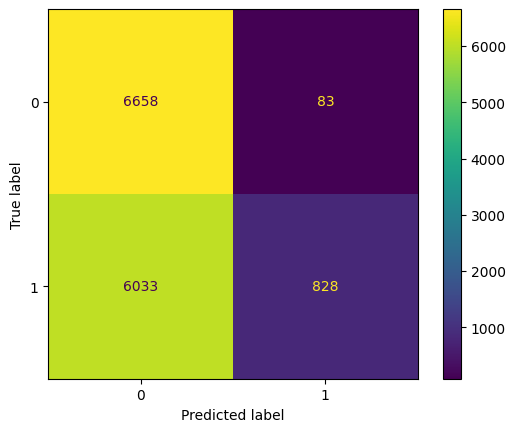

Accuracy: 0.55
Precision: 0.91
Recall: 0.12
F1: 0.21


In [ ]:
def print_metrics(test_y, preds):
  c_mat = confusion_matrix(test_y, preds)
  viz = ConfusionMatrixDisplay(c_mat)
  viz.plot()
  plt.show()
  tp = c_mat[1, 1]
  tn = c_mat[0, 0]
  fp = c_mat[0, 1]
  fn = c_mat[1, 0]
  accuracy = (tp + tn) / len(preds)
  precision = tp / (tp+fp)
  recall = tp / (tp+fn)
  f1 = 2 * precision * recall / (precision + recall)
  print(f'Accuracy: {accuracy:.2f}')
  print(f'Precision: {precision:.2f}')
  print(f'Recall: {recall:.2f}')
  print(f'F1: {f1:.2f}')

print_metrics(test_y, preds)

In [ ]:
pattern = r"\w+'?\w*"


filtered['tokens_2'] = filtered['review'].apply(lambda x: re.findall(pattern, x.lower()))
filtered

,review,sentiment,tokens,label,tokens_2
0,One of the other reviewers has mentioned that ...,positive,"[One, of, the, other, reviewers, has, mentione...",1,"[one, of, the, other, reviewers, has, mentione..."
1,A wonderful little production. <br /><br />The...,positive,"[A, wonderful, little, production, br, br, The...",1,"[a, wonderful, little, production, br, br, the..."
2,I thought this was a wonderful way to spend ti...,positive,"[I, thought, this, was, a, wonderful, way, to,...",1,"[i, thought, this, was, a, wonderful, way, to,..."
3,Basically there's a family where a little boy ...,negative,"[Basically, there, s, a, family, where, a, lit...",0,"[basically, there's, a, family, where, a, litt..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[Petter, Mattei, s, Love, in, the, Time, of, M...",1,"[petter, mattei's, love, in, the, time, of, mo..."
...,...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,"[I, thought, this, movie, did, a, down, right,...",1,"[i, thought, this, movie, did, a, down, right,..."
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,"[Bad, plot, bad, dialogue, bad, acting, idioti...",0,"[bad, plot, bad, dialogue, bad, acting, idioti..."
49997,I am a Catholic taught in parochial elementary...,negative,"[I, am, a, Catholic, taught, in, parochial, el...",0,"[i, am, a, catholic, taught, in, parochial, el..."
49998,I'm going to have to disagree with the previou...,negative,"[I, m, going, to, have, to, disagree, with, th...",0,"[i'm, going, to, have, to, disagree, with, the..."


100%|██████████| 13602/13602 [00:27<00:00, 487.76it/s]


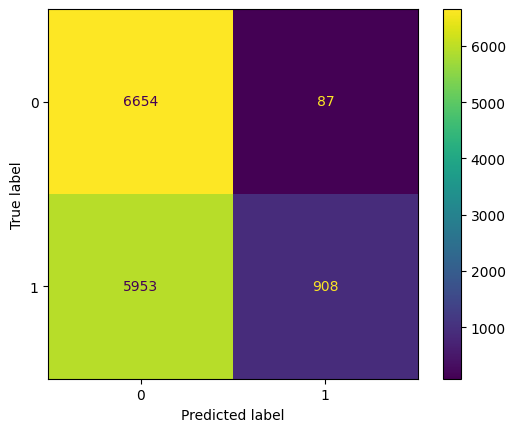

Accuracy: 0.56
Precision: 0.91
Recall: 0.13
F1: 0.23


In [ ]:
def split_and_train(data, token_col):
  train, test = train_test_split(data, test_size=0.3, random_state=420, stratify=data["label"])
  train_x = train[[token_col]]
  train_y = train['label']
  test_x, test_y = test[[token_col]], test['label']
  preds = naive_bayes_prediction(train_x, train_y, test_x, token_col)
  print_metrics(test_y, preds)

split_and_train(filtered, 'tokens_2')

In [ ]:
from contractions import contractions
contractions_lower = {}

for k, v in contractions.items():
  contractions_lower[k.lower()] = v.lower()

In [ ]:
pattern = r"\w+'?\w*"


filtered['review_2'] = filtered['review'].str.lower().replace(contractions_lower, regex=True)
filtered['tokens_2'] = filtered['review_2'].apply(lambda x: re.findall(pattern, x.lower()))
filtered

,review,sentiment,tokens,label,tokens_2,review_2
0,One of the other reviewers has mentioned that ...,positive,"[One, of, the, other, reviewers, has, mentione...",1,"[one, of, the, other, reviewers, has, mentione...",one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,"[A, wonderful, little, production, br, br, The...",1,"[a, wonderful, little, production, br, br, the...",a wonderful little production. <br /><br />the...
2,I thought this was a wonderful way to spend ti...,positive,"[I, thought, this, was, a, wonderful, way, to,...",1,"[i, thought, this, was, a, wonderful, way, to,...",i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,"[Basically, there, s, a, family, where, a, lit...",0,"[basically, there, is, a, family, where, a, li...",basically there is a family where a little boy...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[Petter, Mattei, s, Love, in, the, Time, of, M...",1,"[petter, mattei's, love, in, the, time, of, mo...","petter mattei's ""love in the time of money"" is..."
...,...,...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,"[I, thought, this, movie, did, a, down, right,...",1,"[i, thought, this, movie, did, a, down, right,...",i thought this movie did a down right good job...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,"[Bad, plot, bad, dialogue, bad, acting, idioti...",0,"[bad, plot, bad, dialogue, bad, acting, idioti...","bad plot, bad dialogue, bad acting, idiotic di..."
49997,I am a Catholic taught in parochial elementary...,negative,"[I, am, a, Catholic, taught, in, parochial, el...",0,"[i, am, a, catholic, taught, in, parochial, el...",i am a catholic taught in parochial elementary...
49998,I'm going to have to disagree with the previou...,negative,"[I, m, going, to, have, to, disagree, with, th...",0,"[i, am, going, to, have, to, disagree, with, t...",i am going to have to disagree with the previo...


100%|██████████| 13602/13602 [00:26<00:00, 505.86it/s]


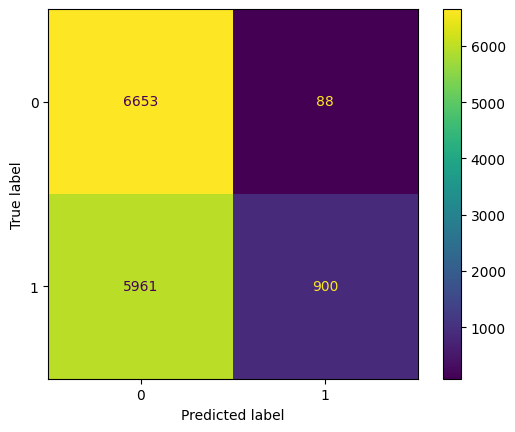

Accuracy: 0.56
Precision: 0.91
Recall: 0.13
F1: 0.23


In [ ]:
split_and_train(filtered, 'tokens_2')

In [ ]:
stopwords = pd.read_csv('stopwords.txt', header=None)[0].str.lower().tolist()
stopwords.append('br')
# stopwords_dict = {k: "" for k in stopwords}

In [ ]:
pattern = r"\w+'?\w*"

filtered['review_2'] = (filtered['review'].str.lower()
                        .replace(contractions_lower, regex=True))
filtered['tokens_3'] = filtered['review_2'].apply(lambda x: re.findall(pattern, x.lower()))

In [ ]:
filtered['tokens_3'] = filtered['tokens_3'].apply(
    lambda x: [y for y in x if y not in stopwords]
    )
filtered

,review,sentiment,tokens,label,tokens_2,review_2,tokens_3
0,One of the other reviewers has mentioned that ...,positive,"[One, of, the, other, reviewers, has, mentione...",1,"[one, of, the, other, reviewers, has, mentione...",one of the other reviewers has mentioned that ...,"[one, reviewers, mentioned, watching, 1, oz, e..."
1,A wonderful little production. <br /><br />The...,positive,"[A, wonderful, little, production, br, br, The...",1,"[a, wonderful, little, production, br, br, the...",a wonderful little production. <br /><br />the...,"[wonderful, little, production, filming, techn..."
2,I thought this was a wonderful way to spend ti...,positive,"[I, thought, this, was, a, wonderful, way, to,...",1,"[i, thought, this, was, a, wonderful, way, to,...",i thought this was a wonderful way to spend ti...,"[thought, wonderful, way, spend, time, hot, su..."
3,Basically there's a family where a little boy ...,negative,"[Basically, there, s, a, family, where, a, lit...",0,"[basically, there, is, a, family, where, a, li...",basically there is a family where a little boy...,"[basically, family, little, boy, jake, thinks,..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[Petter, Mattei, s, Love, in, the, Time, of, M...",1,"[petter, mattei's, love, in, the, time, of, mo...","petter mattei's ""love in the time of money"" is...","[petter, mattei's, love, time, money, visually..."
...,...,...,...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,"[I, thought, this, movie, did, a, down, right,...",1,"[i, thought, this, movie, did, a, down, right,...",i thought this movie did a down right good job...,"[thought, movie, right, good, job, creative, o..."
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,"[Bad, plot, bad, dialogue, bad, acting, idioti...",0,"[bad, plot, bad, dialogue, bad, acting, idioti...","bad plot, bad dialogue, bad acting, idiotic di...","[bad, plot, bad, dialogue, bad, acting, idioti..."
49997,I am a Catholic taught in parochial elementary...,negative,"[I, am, a, Catholic, taught, in, parochial, el...",0,"[i, am, a, catholic, taught, in, parochial, el...",i am a catholic taught in parochial elementary...,"[catholic, taught, parochial, elementary, scho..."
49998,I'm going to have to disagree with the previou...,negative,"[I, m, going, to, have, to, disagree, with, th...",0,"[i, am, going, to, have, to, disagree, with, t...",i am going to have to disagree with the previo...,"[going, disagree, previous, comment, side, mal..."


100%|██████████| 13602/13602 [00:14<00:00, 952.95it/s] 


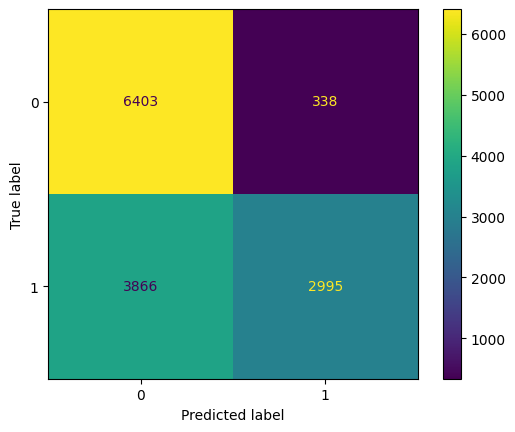

Accuracy: 0.69
Precision: 0.90
Recall: 0.44
F1: 0.59


In [ ]:
split_and_train(filtered, 'tokens_3')

100%|██████████| 9068/9068 [00:12<00:00, 730.49it/s] 


--------------------


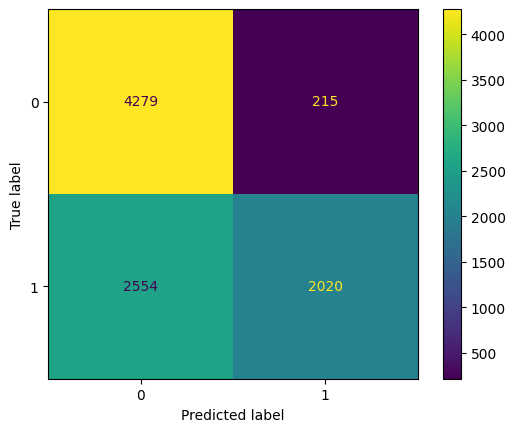

Accuracy: 0.69
Precision: 0.90
Recall: 0.44
F1: 0.59


100%|██████████| 9068/9068 [00:09<00:00, 912.14it/s] 


--------------------


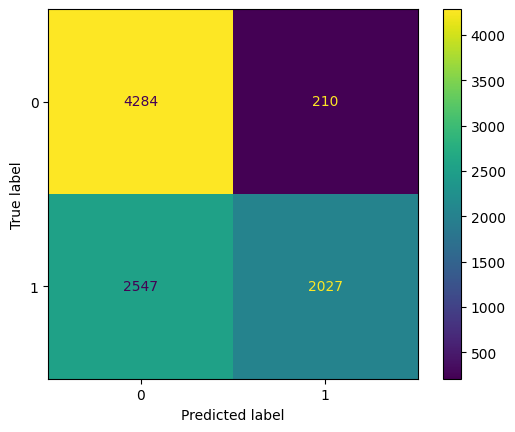

Accuracy: 0.70
Precision: 0.91
Recall: 0.44
F1: 0.60


100%|██████████| 9068/9068 [00:10<00:00, 885.77it/s] 


--------------------


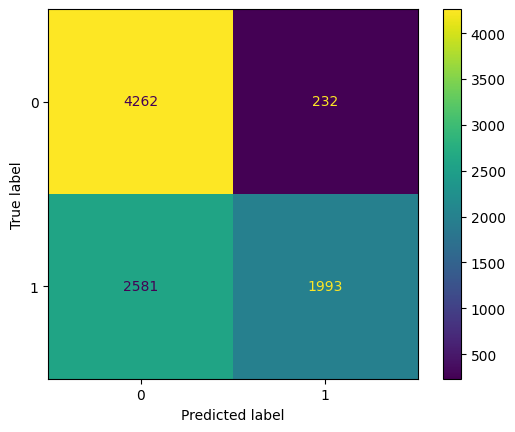

Accuracy: 0.69
Precision: 0.90
Recall: 0.44
F1: 0.59


100%|██████████| 9067/9067 [00:10<00:00, 890.58it/s] 


--------------------


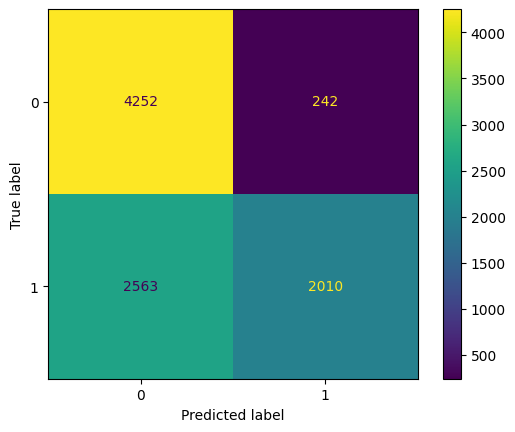

Accuracy: 0.69
Precision: 0.89
Recall: 0.44
F1: 0.59


100%|██████████| 9067/9067 [00:10<00:00, 891.45it/s] 


--------------------


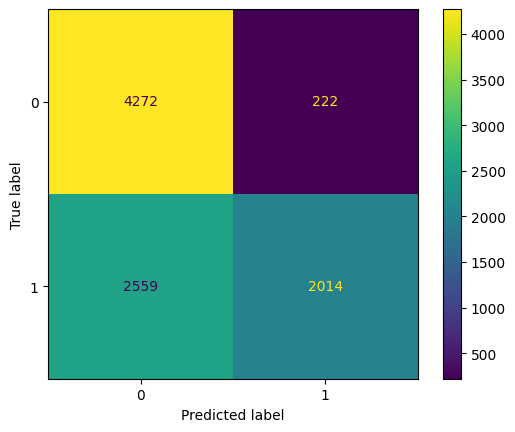

Accuracy: 0.69
Precision: 0.90
Recall: 0.44
F1: 0.59


In [ ]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(5, shuffle=True, random_state=21)

for train_index, test_index in kfold.split(filtered[['tokens_3']], filtered['label']):
  train_x = filtered.iloc[train_index][['tokens_3']]
  test_x = filtered.iloc[test_index][['tokens_3']]
  train_y = filtered.iloc[train_index]['label']
  test_y = filtered.iloc[test_index]['label']

  preds = naive_bayes_prediction(train_x, train_y, test_x, 'tokens_3')
  print('-' * 20)
  print_metrics(test_y, preds)
